# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

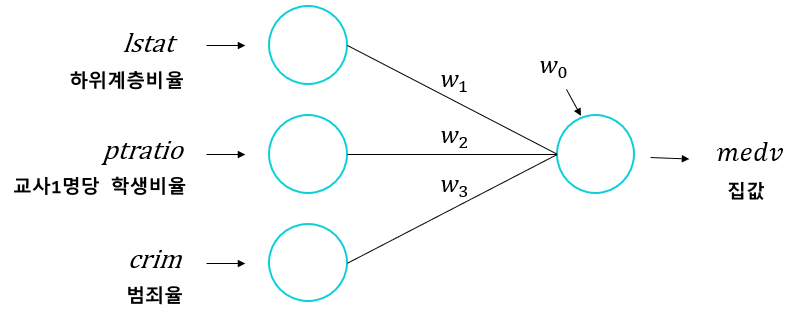

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

In [6]:
x.isna().sum()

lstat      0
ptratio    0
crim       0
dtype: int64

### (3) 가변수화

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lstat    506 non-null    float64
 1   ptratio  506 non-null    float64
 2   crim     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


### (4) 데이터분할

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [11]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [13]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [14]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential( Dense(1, input_shape = (nfeatures,)) )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [15]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [16]:
history = model.fit(x_train, y_train,
                    epochs = 10, validation_split=0.2).history

Epoch 1/10
11/11 [==============================] - 1s 22ms/step - loss: 561.7010 - val_loss: 568.3147
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 480.1337 - val_loss: 490.7122
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 410.1250 - val_loss: 425.2210
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 351.2380 - val_loss: 371.3147
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 303.9173 - val_loss: 326.4012
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 264.9326 - val_loss: 292.0108
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 235.6670 - val_loss: 265.8360
Epoch 8/10
11/11 [==============================] - 0s 5ms/step - loss: 212.3019 - val_loss: 243.6763
Epoch 9/10
11/11 [==============================] - 0s 5ms/step - loss: 194.4264 - val_loss: 227.7355
Epoch 10/10
11/11 [==============================] - 0s 6ms/step - loss: 181.9931

* 학습결과 그래프

In [17]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

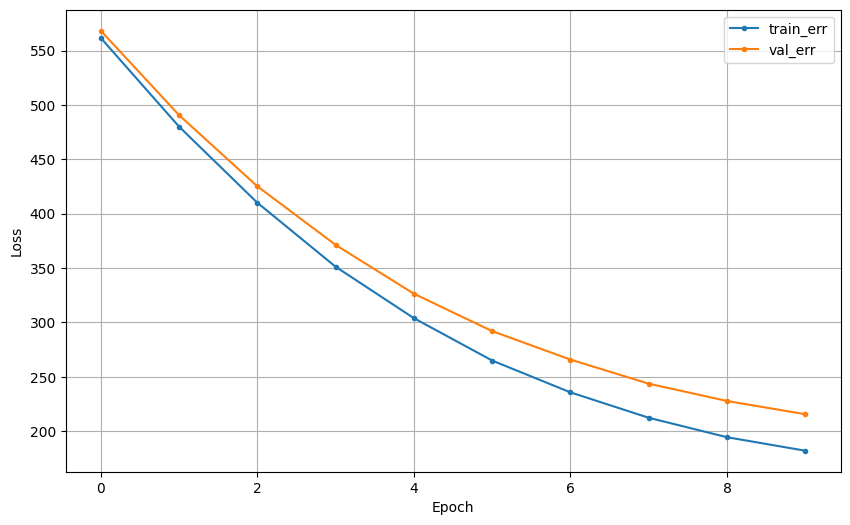

In [18]:
dl_history_plot(history)

### (3) 예측 및 검증

In [19]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [20]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 11.392010883268185
MAE  : 8.120729637145995
MAPE : 0.38529635502370846


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [21]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [22]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [23]:
nfeatures = x_train.shape[1]
nfeatures

12

In [24]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential(Dense(1, input_shape = (nfeatures,)))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [25]:
model2.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [26]:
history = model2.fit(x_train, y_train,epochs = 10, validation_split=0.2).history

Epoch 1/10
11/11 [==============================] - 1s 18ms/step - loss: 463.2876 - val_loss: 406.4167
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 302.4785 - val_loss: 280.9624
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 211.1629 - val_loss: 217.4164
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 167.5466 - val_loss: 188.9183
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 150.5901 - val_loss: 172.7313
Epoch 6/10
11/11 [==============================] - 0s 7ms/step - loss: 139.5729 - val_loss: 158.0732
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 129.3430 - val_loss: 144.9094
Epoch 8/10
11/11 [==============================] - 0s 7ms/step - loss: 118.7408 - val_loss: 132.0181
Epoch 9/10
11/11 [==============================] - 0s 5ms/step - loss: 109.2865 - val_loss: 120.5031
Epoch 10/10
11/11 [==============================] - 0s 7ms/step - loss: 101.0787

* 학습결과 그래프

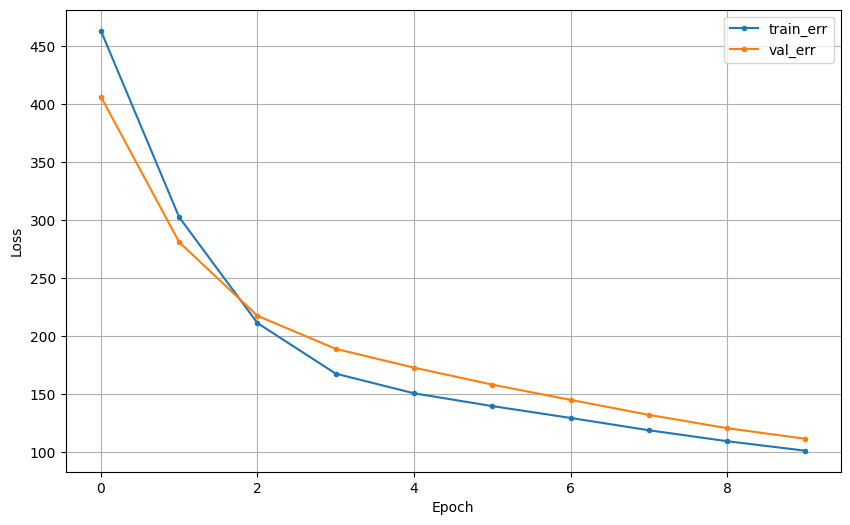

In [27]:
dl_history_plot(history)

* 예측 및 평가

In [28]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 2ms/step
RMSE : 8.641011931804153
MAE  : 6.009032096114814
MAPE : 0.3131910510438701


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [29]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [30]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [31]:
nfeatures = x_train.shape[1]
nfeatures

12

In [32]:
model3 = Sequential(Dense(1, input_shape = (nfeatures,)))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [33]:
model3.compile(optimizer = Adam(learning_rate = 0.05), loss = 'mse')

* 학습

In [36]:
history = model3.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
11/11 [==============================] - 1s 21ms/step - loss: 566.5219 - val_loss: 555.1880
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 461.9272 - val_loss: 458.5584
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 377.4200 - val_loss: 381.4610
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 309.4974 - val_loss: 322.8162
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 260.4164 - val_loss: 278.3791
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 224.4969 - val_loss: 247.7189
Epoch 7/10
11/11 [==============================] - 0s 8ms/step - loss: 200.3284 - val_loss: 225.2713
Epoch 8/10
11/11 [==============================] - 0s 7ms/step - loss: 182.6549 - val_loss: 208.4393
Epoch 9/10
11/11 [==============================] - 0s 7ms/step - loss: 168.3656 - val_loss: 195.0362
Epoch 10/10
11/11 [==============================] - 0s 5ms/step - loss: 158.4166

* 학습결과 그래프

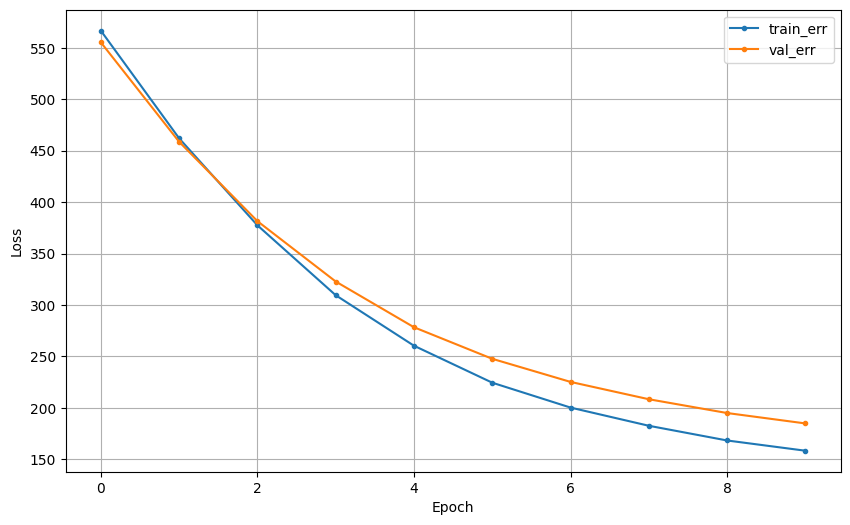

In [37]:
dl_history_plot(history)

* 예측 및 평가

In [38]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 11.080807685966501
MAE  : 8.366447164498123
MAPE : 0.4303307603237334


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [39]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [40]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [41]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [42]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(1)])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [43]:
model3.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [45]:
history = model3.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 0s 14ms/step - loss: 49.5948 - val_loss: 38.8279
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 45.9390 - val_loss: 36.0764
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 43.1258 - val_loss: 33.9244
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 40.5506 - val_loss: 31.5868
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 38.1369 - val_loss: 30.3806
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 36.4407 - val_loss: 30.2139
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 35.3166 - val_loss: 25.5054
Epoch 8/20
11/11 [==============================] - 0s 9ms/step - loss: 34.0674 - val_loss: 24.6671
Epoch 9/20
11/11 [==============================] - 0s 10ms/step - loss: 33.8081 - val_loss: 26.6390
Epoch 10/20
11/11 [==============================] - 0s 11ms/step - loss: 33.1034 - val_loss: 22.7

* 학습결과 그래프

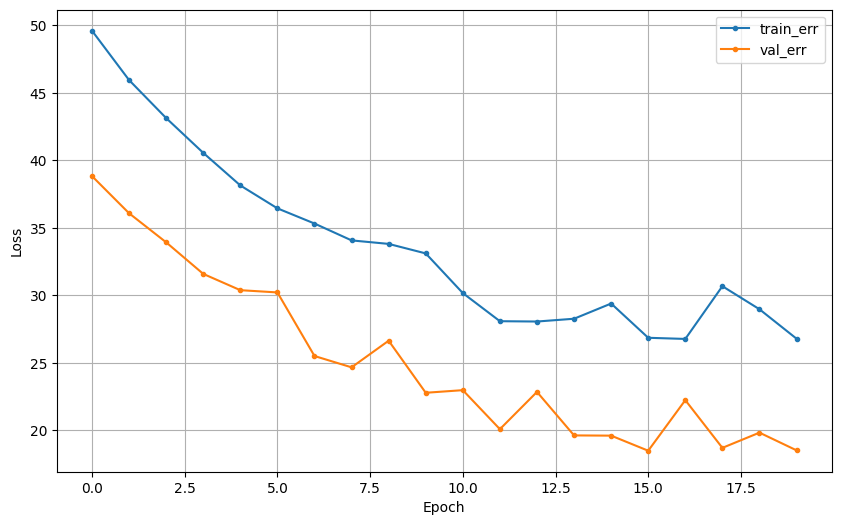

In [46]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

### (3) 실습1

* 다음의 summary를 보고, 먼저 구조를 그려봅시다. 그리고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [49]:
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'), Dense(1)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [50]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
11/11 [==============================] - 1s 23ms/step - loss: 480.9083 - val_loss: 267.2773
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 179.9823 - val_loss: 179.4265
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 125.7032 - val_loss: 119.1359
Epoch 4/50
11/11 [==============================] - 0s 22ms/step - loss: 89.5561 - val_loss: 70.1200
Epoch 5/50
11/11 [==============================] - 0s 35ms/step - loss: 71.1483 - val_loss: 56.6159
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 66.1788 - val_loss: 50.5032
Epoch 7/50
11/11 [==============================] - 0s 22ms/step - loss: 57.2261 - val_loss: 47.0460
Epoch 8/50
11/11 [==============================] - 0s 8ms/step - loss: 52.5472 - val_loss: 42.1650
Epoch 9/50
11/11 [==============================] - 0s 8ms/step - loss: 47.6945 - val_loss: 38.0323
Epoch 10/50
11/11 [==============================] - 0s 13ms/step - loss: 43.0608 - val_l

* 학습곡선

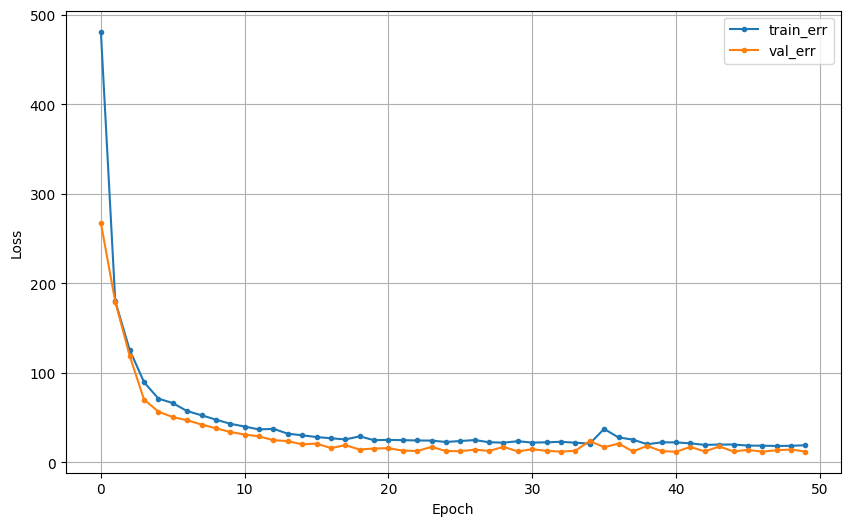

In [51]:
dl_history_plot(history)

* 검증

In [52]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 3.9961652908157097
MAE  : 3.0204633619271073
MAPE : 0.16245945584717347


### (4) 실습2

* 다음의 summary를 보고, 먼저 구조를 그려봅시다. 그리고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [53]:
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'), Dense(4, input_shape = (8,), activation = 'relu'), Dense(1)])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [54]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
11/11 [==============================] - 1s 18ms/step - loss: 449.8896 - val_loss: 178.8922
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 165.8062 - val_loss: 141.8006
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 100.7090 - val_loss: 75.9485
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 68.6974 - val_loss: 57.8233
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 58.6520 - val_loss: 44.8032
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 54.6572 - val_loss: 43.4124
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 48.0627 - val_loss: 34.9209
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 43.7774 - val_loss: 33.2700
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 38.9282 - val_loss: 26.0844
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 34.6609 - val_loss: 2

* 학습곡선

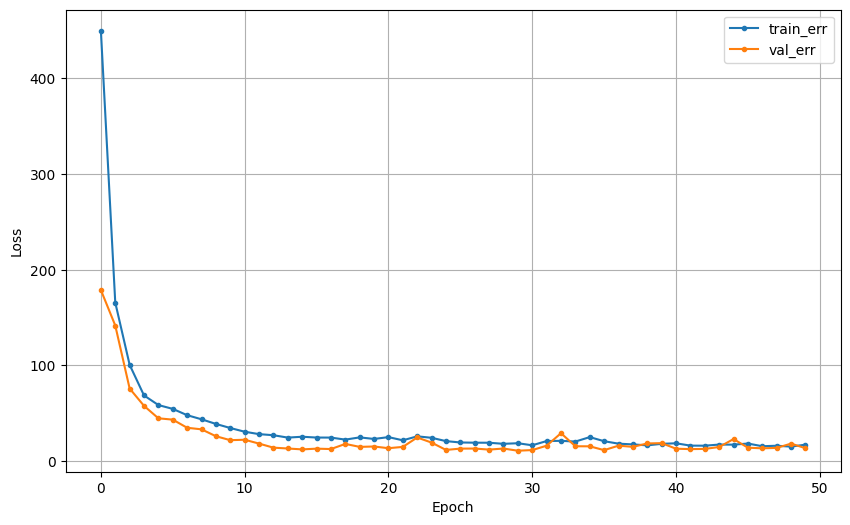

In [55]:
dl_history_plot(history)

* 검증

In [56]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.315550320645282
MAE  : 3.451430560093301
MAPE : 0.1888560186277151


### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


* 컴파일 + 학습

* 학습곡선

* 검증